In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\Advertising.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

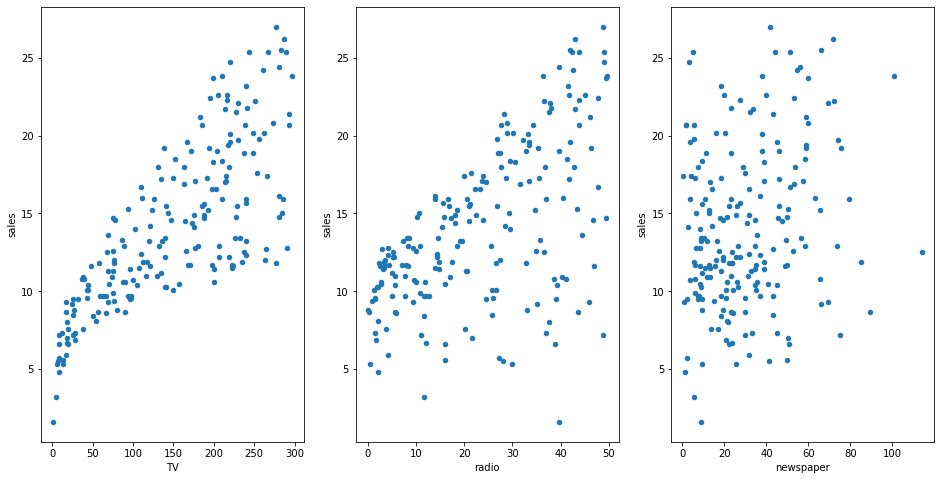

In [21]:
fig,axs=plt.subplots(1,3)

data.plot(kind='scatter',x='TV', y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2],figsize=(16,8))


In [30]:
data=data.drop(columns=['Unnamed: 0'])

In [31]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='TV', ylabel='sales'>

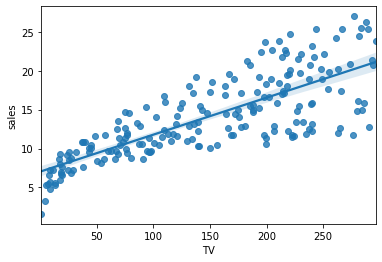

In [48]:
sns.regplot(x='TV',y='sales', data=data)

<AxesSubplot:xlabel='radio', ylabel='sales'>

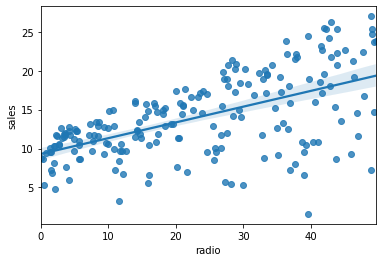

In [49]:
sns.regplot(x='radio',y='sales', data=data)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

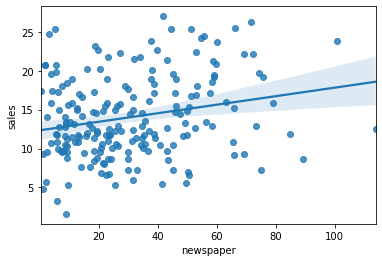

In [50]:
sns.regplot(x='newspaper',y='sales', data=data)

In [53]:
x=data.drop(columns=['sales'])
y=data

In [54]:
Scaler=StandardScaler()
X_Scaled=Scaler.fit_transform(x)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled, y, test_size=0.25, random_state=50)

In [56]:
y_train.head()

,TV,radio,newspaper,sales
1,44.5,39.3,45.1,10.4
116,139.2,14.3,25.6,12.2
100,222.4,4.3,49.8,11.7
166,17.9,37.6,21.6,8.0
168,215.4,23.6,57.6,17.1


In [57]:
regression=LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [58]:
data.tail(2)

,TV,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [59]:
regression.score(x_test,y_test)

0.9697251663248619

In [61]:
y_pred=regression.predict(x_test)

In [62]:
y_pred

array([[175.7       ,  15.4       ,   2.4       ,  13.80954103],
       [234.5       ,   3.4       ,  84.8       ,  14.6637734 ],
       [ 23.8       ,  35.1       ,  65.9       ,  10.53594392],
       [129.4       ,   5.7       ,  31.3       ,   9.94329962],
       [ 96.2       ,  14.8       ,  38.9       ,  10.09102145],
       [218.4       ,  27.7       ,  53.4       ,  18.2826515 ],
       [232.1       ,   8.6       ,   8.7       ,  15.23069647],
       [  8.6       ,   2.1       ,   1.        ,   3.47866075],
       [228.        ,  37.7       ,  32.        ,  20.50438323],
       [ 88.3       ,  25.5       ,  73.4       ,  11.82515208],
       [239.8       ,   4.1       ,  36.9       ,  14.86548863],
       [177.        ,   9.3       ,   6.4       ,  12.75766989],
       [216.8       ,  43.9       ,  27.2       ,  21.10572152],
       [172.5       ,  18.1       ,  30.7       ,  14.26282047],
       [262.9       ,   3.5       ,  19.5       ,  15.77765346],
       [135.2       ,  41

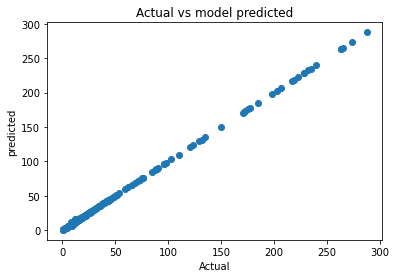

In [63]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs model predicted')

plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
y_pred=regression.predict(x_test)

In [66]:
mean_absolute_error(y_test,y_pred)

0.2812363648597407

In [67]:
mean_squared_error(y_test, y_pred)

0.5300416156402027

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.7280395701060504

In [72]:
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV

In [73]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [79]:
ridgecv.alpha_

0.001

In [80]:
ridge_model=Ridge(alpha=ridgecv.alpha_)

In [81]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [82]:
ridge_model.score(x_test,y_test)

0.9697253876558127